<a href="https://colab.research.google.com/github/YaokunLin/Algorithms/blob/main/1277_Count_Square_Submatrices_with_All_Ones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

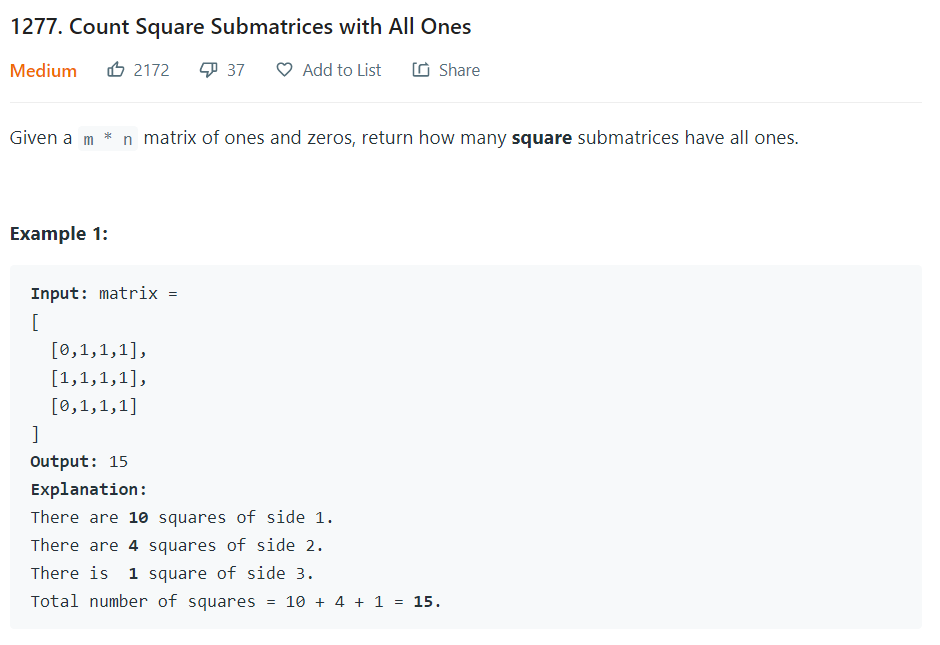

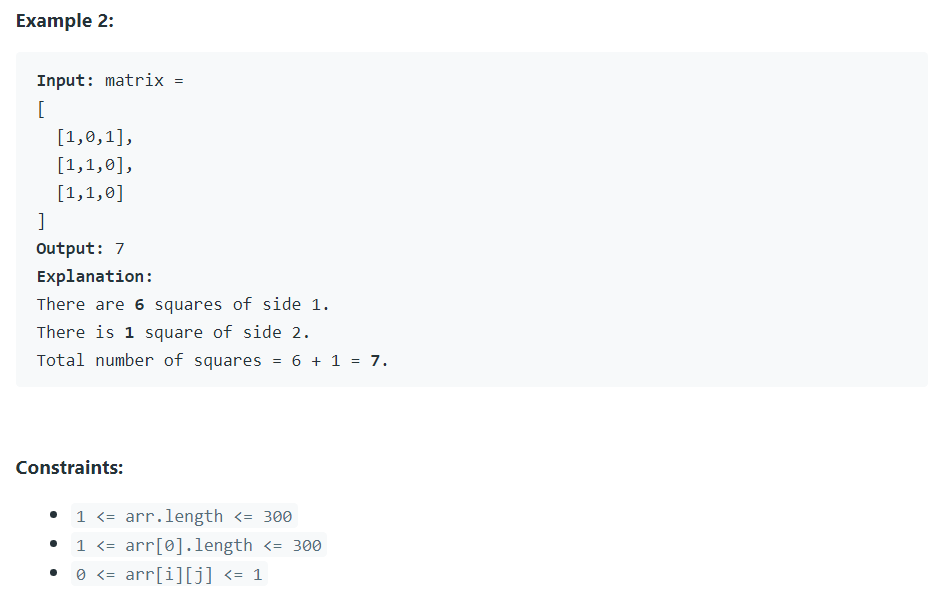

In [ ]:
#Brute Force
class Solution(object):
    def countSquares(self, matrix):
      numR=len(matrix)
      numC = len(matrix[0])
      maxSides = min(numR,numC)
      numSqSide1 = sum([sum(row) for row in matrix])
      totalNumSqs = numSqSide1

      def checkSq(rIdx,cIdx,sides):
        for rowOffset in range(0,sides):
          for colOffset in range (0,sides):
            if rIdx+rowOffset <= numR-1 and cIdx+colOffset <= numC-1 and matrix[rIdx+rowOffset][cIdx+colOffset]==0: 
              return False
            if rIdx+rowOffset > numR-1 or cIdx+colOffset > numC-1: return False
        return True       
    

      for sides in range(2,maxSides+1):
        for rIdx, r in enumerate(matrix):
          for cIdx, element in enumerate(r):
            if checkSq(rIdx,cIdx,sides): totalNumSqs +=1

      return totalNumSqs

In [ ]:
#dynamic Programming
class Solution(object):
    def countSquares(self, matrix):
      numR=len(matrix)
      numC = len(matrix[0])
      maxSides = min(numR,numC)
      numSqSide1 = sum([sum(row) for row in matrix])
      totalNumSqs = numSqSide1
      subSqSidesRecords=[row[:] for row in matrix] #copy the matrix to have a starting record

      def checkSq(rIdx,cIdx,sides):
        if rIdx+sides-1 > numR-1 or cIdx+sides-1 > numC-1:  return False
        
        bottomRightCoroner=matrix[rIdx+sides-1][cIdx+sides-1]
        if bottomRightCoroner == 0: return False 
        
        for rowOffset in range(1,sides):
          if matrix[rIdx+sides-1-rowOffset][cIdx+sides-1]==0: return False
          
        for colOffset in range(1,sides):
          if matrix[rIdx+sides-1][cIdx+sides-1-colOffset]==0: return False
          
        return True
                       
    
      for sides in range(2,maxSides+1):
        for rIdx, r in enumerate(matrix):
          for cIdx, element in enumerate(r):
            if subSqSidesRecords[rIdx][cIdx] == sides -1 and checkSq(rIdx,cIdx,sides): 
              totalNumSqs +=1
              subSqSidesRecords[rIdx][cIdx] = sides

      return totalNumSqs